Dataset reference : ARIMA&Prophet_data.csv

In [1]:
#loading necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
dataset_df = pd.read_csv('Store85 Sales.csv', encoding = 'latin-1')

print('The dataframe sample is as shown: ')
dataset_df.head(5)

The dataframe sample is as shown: 


,Date,Sales
0,1/1/2013,4220
1,1/2/2013,6069
2,1/3/2013,5246
3,1/4/2013,5339
4,1/5/2013,5774


From the dataframe, we would like to eliminate those records where the Sales value is 0 if any

In [3]:
print('The dataframe has the following dimensions - before cleaning: ', dataset_df.shape)

dataset_df = dataset_df[dataset_df['Sales'] != 0]

print('The dataframe has the following dimensions - after cleaning: ', dataset_df.shape)

The dataframe has the following dimensions - before cleaning:  (942, 2)
The dataframe has the following dimensions - after cleaning:  (942, 2)


In [4]:
dataset_df.rename(columns = {'Date': 'ds','Sales':'y'}, inplace = True)

print('The column names of the dataframe Date, Sales are changed to ds and y respectively')
dataset_df.head(5)

The column names of the dataframe Date, Sales are changed to ds and y respectively


,ds,y
0,1/1/2013,4220
1,1/2/2013,6069
2,1/3/2013,5246
3,1/4/2013,5339
4,1/5/2013,5774


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


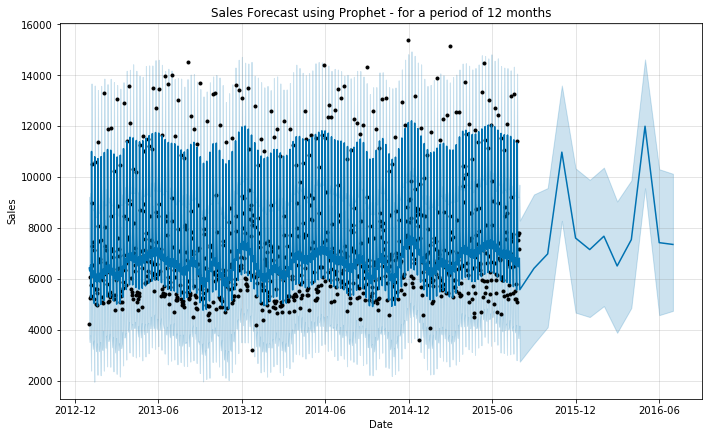

In [5]:
prophet_model = Prophet(interval_width = 0.95)
prophet_model.fit(dataset_df)

forecast = prophet_model.make_future_dataframe(periods = 12, freq = 'MS')
forecast = prophet_model.predict(forecast)

plt.figure(figsize = (45,8))
prophet_model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Sales Forecast using Prophet - for a period of 12 months')

In [13]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,7170.033786,3670.993928,9223.224387,7170.033786,7170.033786,-748.858078,-748.858078,-748.858078,-725.713784,-725.713784,-725.713784,-23.144294,-23.144294,-23.144294,0.0,0.0,0.0,6421.175708
1,2013-01-02,7170.026942,3509.620046,9059.476190,7170.026942,7170.026942,-864.309664,-864.309664,-864.309664,-798.626455,-798.626455,-798.626455,-65.683209,-65.683209,-65.683209,0.0,0.0,0.0,6305.717279
2,2013-01-03,7170.020099,3774.623128,9013.266991,7170.020099,7170.020099,-799.950372,-799.950372,-799.950372,-692.590609,-692.590609,-692.590609,-107.359762,-107.359762,-107.359762,0.0,0.0,0.0,6370.069727
3,2013-01-04,7170.013255,3747.347412,9380.849407,7170.013255,7170.013255,-627.382455,-627.382455,-627.382455,-479.400492,-479.400492,-479.400492,-147.981963,-147.981963,-147.981963,0.0,0.0,0.0,6542.630800
4,2013-01-05,7170.006412,2391.666000,8017.709370,7170.006412,7170.006412,-1919.549956,-1919.549956,-1919.549956,-1732.192623,-1732.192623,-1732.192623,-187.357332,-187.357332,-187.357332,0.0,0.0,0.0,5250.456456
5,2013-01-06,7169.999568,8329.825900,13675.816972,7169.999568,7169.999568,3834.721641,3834.721641,3834.721641,4060.014889,4060.014889,4060.014889,-225.293248,-225.293248,-225.293248,0.0,0.0,0.0,11004.721209
6,2013-01-07,7169.992725,4665.163335,10025.446690,7169.992725,7169.992725,106.911550,106.911550,106.911550,368.509075,368.509075,368.509075,-261.597525,-261.597525,-261.597525,0.0,0.0,0.0,7276.904274
7,2013-01-08,7169.985881,3453.499911,8848.562734,7169.985881,7169.985881,-1021.793071,-1021.793071,-1021.793071,-725.713784,-725.713784,-725.713784,-296.079288,-296.079288,-296.079288,0.0,0.0,0.0,6148.192810
8,2013-01-09,7169.979037,3250.818743,8692.507728,7169.979037,7169.979037,-1127.176601,-1127.176601,-1127.176601,-798.626455,-798.626455,-798.626455,-328.550146,-328.550146,-328.550146,0.0,0.0,0.0,6042.802437
9,2013-01-10,7169.972194,3424.772625,8843.944127,7169.972194,7169.972194,-1051.416326,-1051.416326,-1051.416326,-692.590609,-692.590609,-692.590609,-358.825717,-358.825717,-358.825717,0.0,0.0,0.0,6118.555868


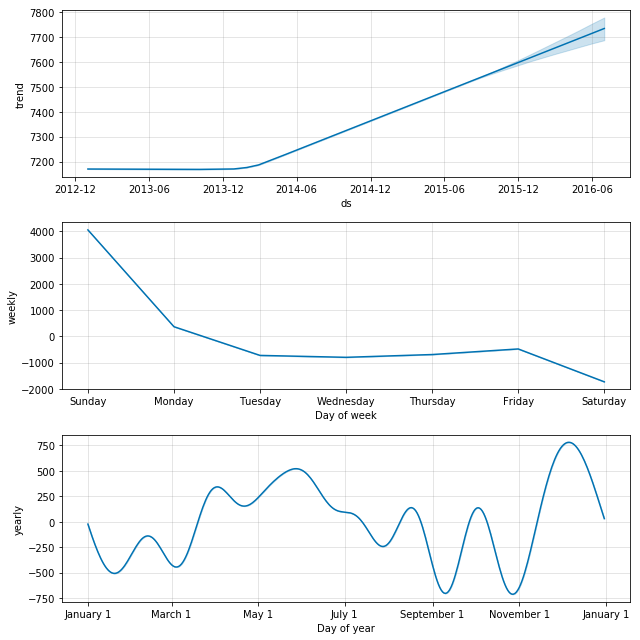

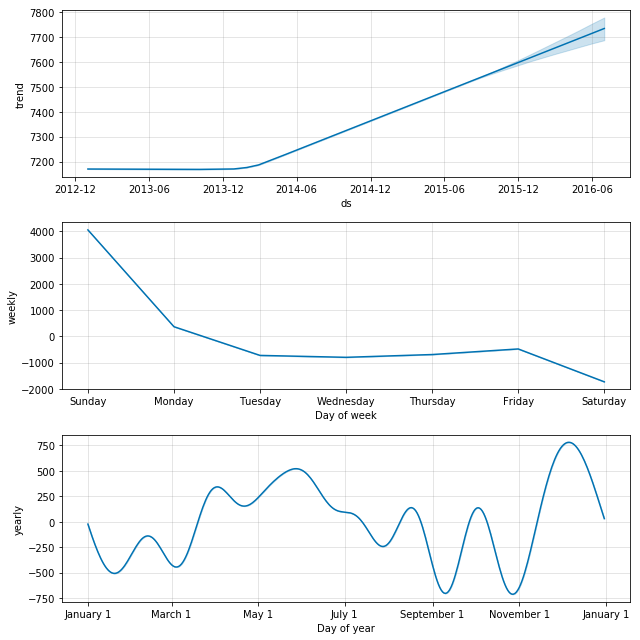

In [14]:
prophet_model.plot_components(forecast)